<a href="https://colab.research.google.com/github/rmtu14/ATM-/blob/main/TensorFlowEpochs%20without%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print the shape of the loaded data
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


11490434/11490434 [==============================] - 0s 0us/step
Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


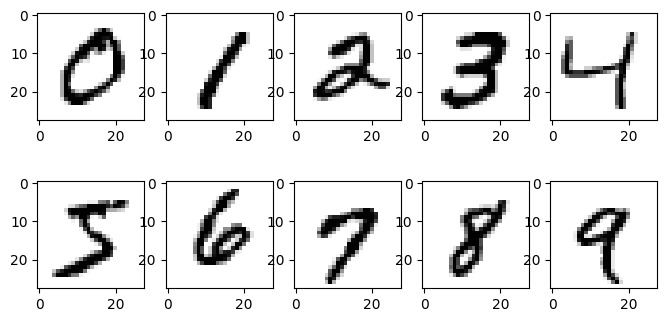

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (_, _) = mnist.load_data()

# Define subplots (2,5)
fig, ax = plt.subplots(2, 5, figsize=(8, 4))

# Loop over ax.flatten() and plot each digit
for i, ax in enumerate(ax.flatten()):
    # Choose each digit occurring at its first instance
    im_idx = np.where(train_labels == i)[0][0]

    # Reshape the selected digit to (28, 28) from (1, 28, 28)
    plottable_image = train_images[im_idx].reshape(28, 28)

    # Now pass this plottable_image to ax.imshow
    ax.imshow(plottable_image, cmap='gray_r')

plt.show()



In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape train_images from (60000, 28, 28) to (60000, 28*28)
train_images = train_images.reshape((60000, 28 * 28))

# Convert dtype of train_images from uint8 to float32
train_images = train_images.astype('float32')

# Reshape test_images from (10000, 28, 28) to (10000, 28*28)
test_images = test_images.reshape((10000, 28 * 28))

# Convert dtype of test_images from uint8 to float32
test_images = test_images.astype('float32')


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add the first dense layer with 512 neurons and activation='relu'
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# Add the second dense layer with 10 neurons and activation='softmax'
model.add(layers.Dense(10, activation='softmax'))

# Print a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 6.1750 - accuracy: 0.8929 - val_loss: 1.1197 - val_accuracy: 0.9401
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.7844 - accuracy: 0.9502 - val_loss: 0.7380 - val_accuracy: 0.9526
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.4903 - accuracy: 0.9642 - val_loss: 0.8289 - val_accuracy: 0.9532
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.4364 - accuracy: 0.9698 - val_loss: 0.6916 - val_accuracy: 0.9643
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 0.3385 - accuracy: 0.9751 - val_loss: 0.6741 - val_accuracy: 0.9643
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2815 - accuracy: 0.9789 - val_loss: 0.7474 - val_accuracy: 0.9672
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2568 - accuracy: 0.9814 - val_loss: 0.7776 - val_accuracy: 0.9646

In [7]:
# Define a variable test_digits and store the first 10 images of test data
test_digits = test_images[:10]

# Predict on the test_digits using our model
predictions = model.predict(test_digits)

# Check the first image prediction from predictions
first_image_prediction = predictions[0]
print("Predictions for the first image:")
print(first_image_prediction)


1/1 [==============================] - 0s 82ms/step
Predictions for the first image:
[0.0000000e+00 0.0000000e+00 0.0000000e+00 8.4585866e-36 0.0000000e+00
 0.0000000e+00 0.0000000e+00 9.9999994e-01 0.0000000e+00 0.0000000e+00]


In [8]:
# Checking the index having maximum prediction
predicted_digit_index = tf.argmax(first_image_prediction).numpy()
print("Index having maximum prediction:", predicted_digit_index)

# Checking the value at the index having maximum prediction
max_prediction_value = first_image_prediction[predicted_digit_index]
print("Maximum prediction value:", max_prediction_value)

# Checking the label for that index having maximum prediction
true_label = test_labels[0]
print("True label for the first image:", true_label)

# Confirming whether the prediction is right or wrong
prediction_is_correct = predicted_digit_index == true_label
print("Is the prediction correct?", prediction_is_correct)


Index having maximum prediction: 7
Maximum prediction value: 0.99999994
True label for the first image: 7
Is the prediction correct? True


In [9]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.6953 - accuracy: 0.9721
Test Loss: 0.6953367590904236
Test Accuracy: 0.972100019454956


In [10]:
# Evaluate the model on test data and print test accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 2s 5ms/step - loss: 0.6953 - accuracy: 0.9721
Test Accuracy: 0.972100019454956


In [11]:
from tensorflow.keras import models, layers

# Build the second model
model2 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model2
model2.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Fit model2
history2 = model2.fit(train_images, train_labels, epochs=6, batch_size=128, validation_split=0.2)


Epoch 1/6
375/375 [==============================] - 3s 7ms/step - loss: 2.9208 - accuracy: 0.8573 - val_loss: 0.7299 - val_accuracy: 0.9087
Epoch 2/6
375/375 [==============================] - 2s 6ms/step - loss: 0.5726 - accuracy: 0.9262 - val_loss: 0.4952 - val_accuracy: 0.9329
Epoch 3/6
375/375 [==============================] - 2s 6ms/step - loss: 0.3683 - accuracy: 0.9448 - val_loss: 0.4381 - val_accuracy: 0.9392
Epoch 4/6
375/375 [==============================] - 4s 12ms/step - loss: 0.2783 - accuracy: 0.9549 - val_loss: 0.4179 - val_accuracy: 0.9432
Epoch 5/6
375/375 [==============================] - 2s 6ms/step - loss: 0.2235 - accuracy: 0.9621 - val_loss: 0.3307 - val_accuracy: 0.9570
Epoch 6/6
375/375 [==============================] - 2s 6ms/step - loss: 0.1799 - accuracy: 0.9688 - val_loss: 0.3512 - val_accuracy: 0.9526


In [12]:
from tensorflow.keras import models, layers

# Build the third model
model3 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model3
model3.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Fit model3
history3 = model3.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
375/375 [==============================] - 3s 8ms/step - loss: 2.7046 - accuracy: 0.8126 - val_loss: 0.6639 - val_accuracy: 0.8808
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 0.5242 - accuracy: 0.8975 - val_loss: 0.4095 - val_accuracy: 0.9119
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.3546 - accuracy: 0.9225 - val_loss: 0.3668 - val_accuracy: 0.9243
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 0.2847 - accuracy: 0.9371 - val_loss: 0.3095 - val_accuracy: 0.9345
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.2314 - accuracy: 0.9488 - val_loss: 0.3024 - val_accuracy: 0.9412
